Mean Squared Error: 0.39682353890207916
Root Mean Squared Error: 0.6299393136660699
Mean Absolute Error: 0.49059459528439103
R-squared Score: 0.6956769454237726
Explained Variance Score: 0.7177435860835463


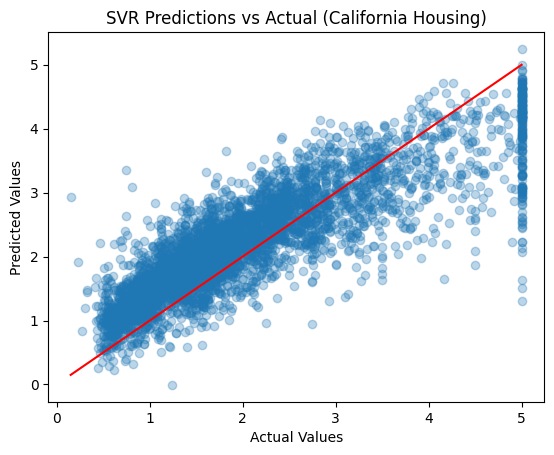

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

data = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=1.0, epsilon=0.9, gamma=0.1)  # kernels: linear, rbf, poly, sigmoid
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared Score:', r2)
print('Explained Variance Score:', evs)

plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title("SVR Predictions vs Actual (California Housing)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
